---
title: Head coach Exploratory data analysis
description: ...
---

### Imports

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from IPython.display import display, Markdown, HTML
from datetime import datetime

sns.set_style()
sns.set_theme(style = 'ticks', palette = 'pastel')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.bbox'] = 'tight'
sns.set_context("paper")

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.directory'] = 'figures'


### Loading data

In [2]:
head_coach = pd.read_csv('data/head_coach.csv', parse_dates=['appointed', 'end_date'])
head_coach.head()

,team,league,country,coach_name,staff_dob,staff_nationality,staff_nationality_secondary,appointed,end_date,days_in_post,matches,wins,draws,losses
0,Manchester City,Premier League,England,Pep Guardiola,"Jan 18, 1971",Spain,NaN,2016-07-01,NaT,2784,450,333,53,64
1,Liverpool,Premier League,England,Jürgen Klopp,"Jun 16, 1967",Germany,NaN,2015-10-08,2024-06-30,3188,468,291,96,81
2,Chelsea,Premier League,England,Graham Potter,"May 20, 1975",England,NaN,2022-09-08,2023-04-02,206,31,12,8,11
3,Chelsea,Premier League,England,Thomas Tuchel,"Aug 29, 1973",Germany,NaN,2021-01-26,2022-09-07,589,100,63,19,18
4,Chelsea,Premier League,England,Frank Lampard,"Jun 20, 1978",England,NaN,2019-07-04,2021-01-25,571,84,44,15,25


### General information about data

Data collected from match results ranges from {eval}`min_year.strftime("%m/%d/%Y")` to {eval}`max_year.strftime("%m/%d/%Y")` and contains the results of {eval}`len(match_results)` matches.

Matches have been collected for the following leagues : **{eval}`", ".join(match_results['league'].unique().tolist())`**

### Basic plots

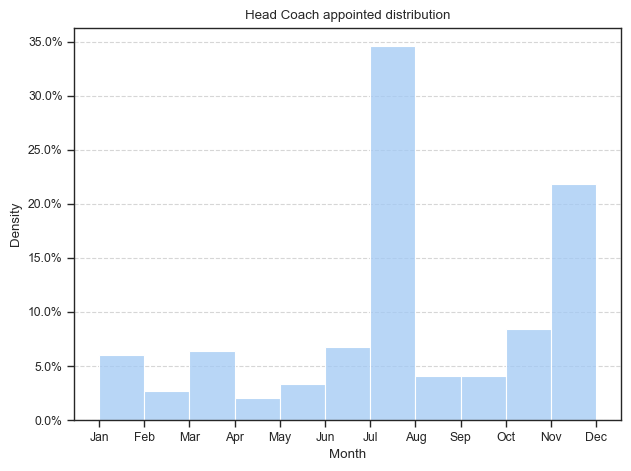

In [4]:
# Useful to add xtick months to dayofyear plot
months = pd.date_range('2022-01-01', '2022-12-31', freq='M').strftime('%b').tolist()

# Plot for Head Coach appointed distribution
plt.figure()
sns.histplot(head_coach['appointed'].dt.month, bins=11, color = 'b', kde=False, stat='density')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.xticks(range(1, 13), months)
plt.title('Head Coach appointed distribution')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/head_coach_appointed_distribution.png')

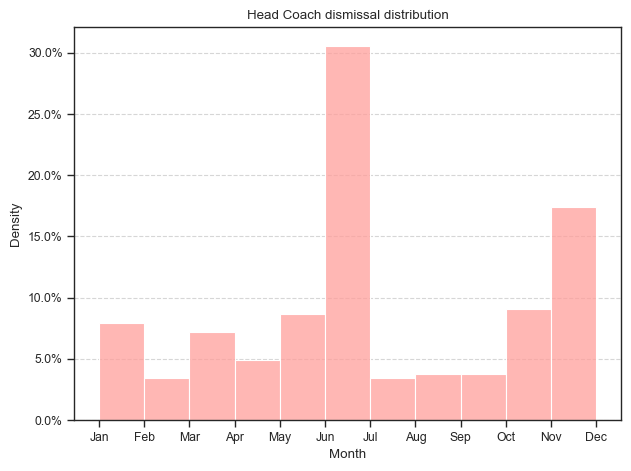

In [5]:
# Plot for Head Coach dismissal distribution
plt.figure()
sns.histplot(head_coach['end_date'].dt.month, bins=11, color = 'r', kde=False, stat='density')
plt.xticks(range(1, 13), months)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title('Head Coach dismissal distribution')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.savefig('figures/head_coach_dismissal_distribution.png')

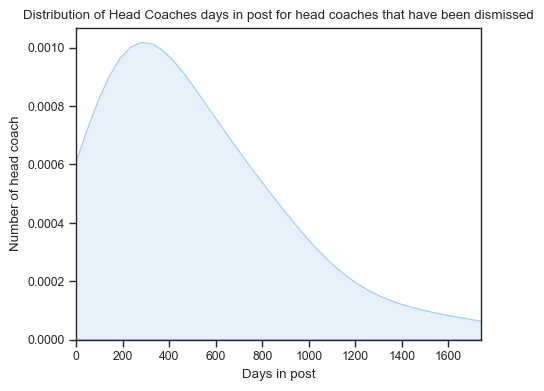

In [43]:
head_coach_dismissed = head_coach[head_coach['end_date'].notnull()]

# Plot distribution of head_coach['days_in_post'] 
plt.figure(figsize=(5, 4))
sns.kdeplot(head_coach_dismissed['days_in_post'], fill=True)
plt.xlim(0, head_coach_dismissed['days_in_post'].quantile(0.97))
plt.title('Distribution of Head Coaches days in post for head coaches that have been dismissed')
plt.xlabel('Days in post')
plt.ylabel('Number of head coach')
plt.savefig('figures/days_in_post_distribution.png')

En moyenne, les coachs sont restés en poste {eval}`round(head_coach_dismissed['days_in_post'].mean())` jours.

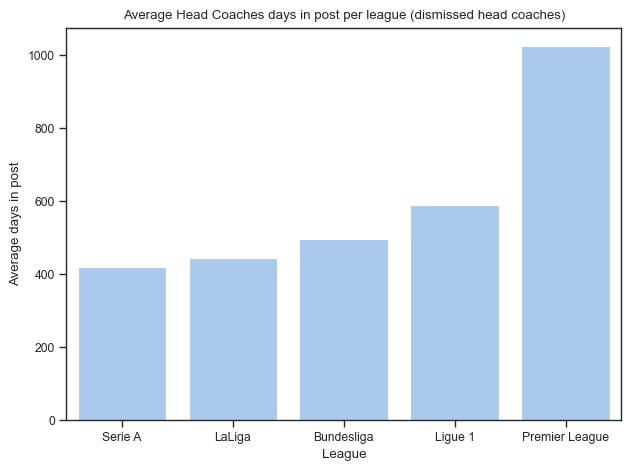

In [45]:
# Average days in post per league 

# Calculate average days in post per league
avg_days_in_post = head_coach_dismissed.groupby('league')['days_in_post'].mean()
avg_days_in_post = avg_days_in_post.sort_values()

# Plot average days in post per league
plt.figure()
sns.barplot(x=avg_days_in_post.index, y=avg_days_in_post.values)
plt.title('Average Head Coaches days in post per league (dismissed head coaches)')
plt.ylabel('Average days in post')
plt.xlabel('League')

plt.savefig('figures/avg_days_in_post_per_league.png')

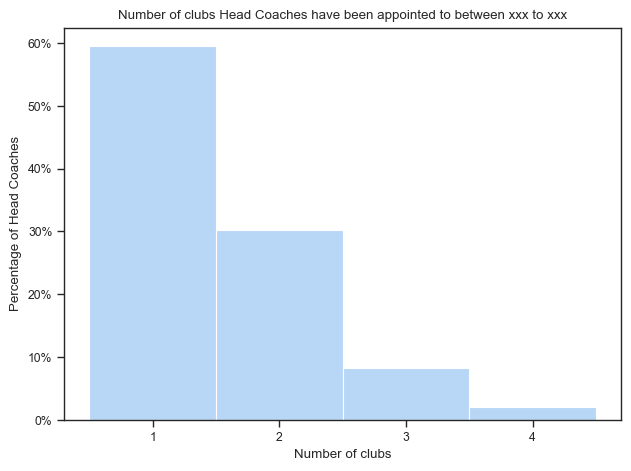

In [8]:
# Number of club head coach has been

# Group by coach_name and count the number of clubs
club_per_coach = head_coach.groupby('coach_name').size().reset_index(name='count')

plt.figure()
sns.histplot(x='count', data = club_per_coach, discrete = True, stat="probability")
plt.xticks(range(1, club_per_coach['count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title(f'Number of clubs Head Coaches have been appointed to between xxx to xxx')
plt.xlabel('Number of clubs')
plt.ylabel('Percentage of Head Coaches')
plt.savefig('figures/club_count_distribution.png')

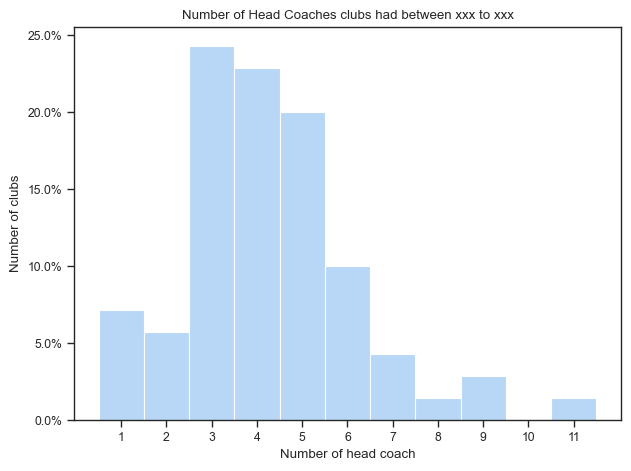

In [10]:
# Number of coach club has seen

# Group by team and count the number of head coach
coach_per_club = head_coach.groupby('team').size().reset_index(name='count')

plt.figure()
sns.histplot(x='count', data = coach_per_club, discrete=True, stat="probability")
plt.xticks(range(1, coach_per_club['count'].max() + 1))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
plt.title(f'Number of Head Coaches clubs had between xxx to xxx')
plt.xlabel('Number of head coach')
plt.ylabel('Number of clubs')
plt.savefig('figures/coach_count_distribution.png')

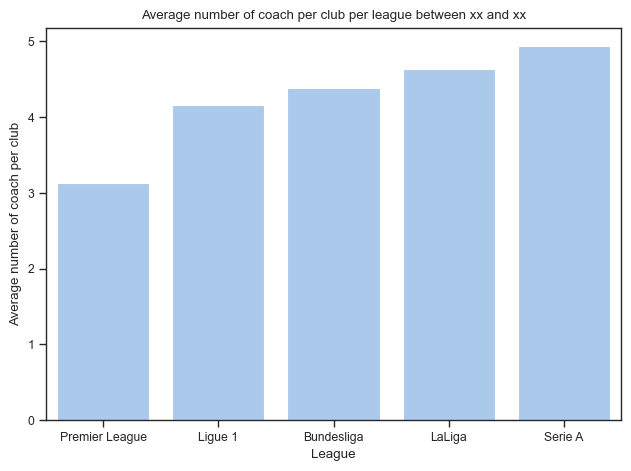

In [12]:
# Average number of coach per club per league 

# Calculate average number of coach per club per league
coach_per_team = head_coach.groupby(['league', 'team']).size()
avg_number_of_coach_per_club_per_league = coach_per_team.groupby('league').mean().sort_values()

# Plot average number of coach per club per league
plt.figure()
sns.barplot(x=avg_number_of_coach_per_club_per_league.index, y=avg_number_of_coach_per_club_per_league.values)
plt.title('Average number of coach per club per league between xx and xx')
plt.ylabel('Average number of coach per club')
plt.xlabel('League')
plt.savefig('figures/avg_number_of_coach_per_club_per_league.png')

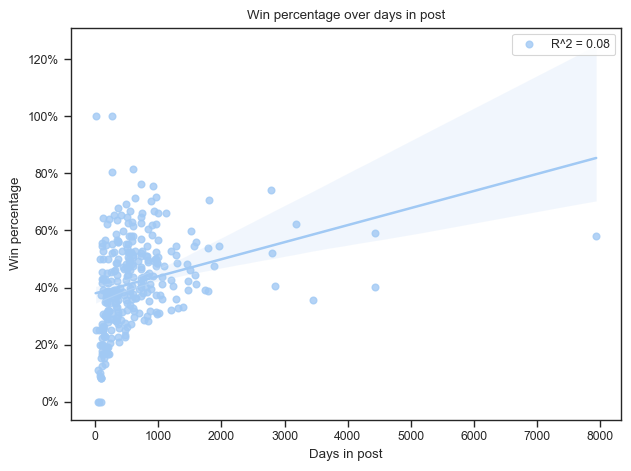

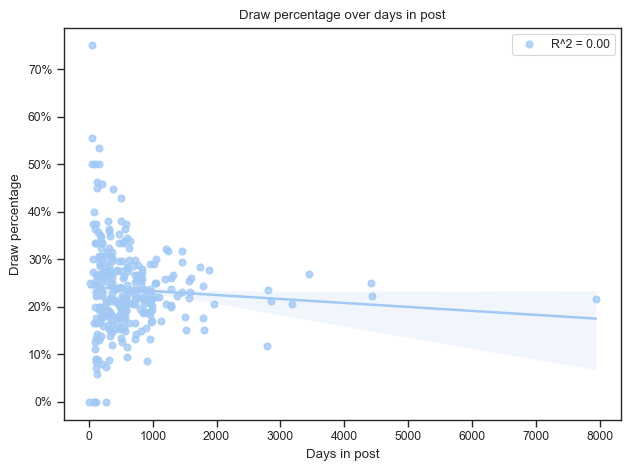

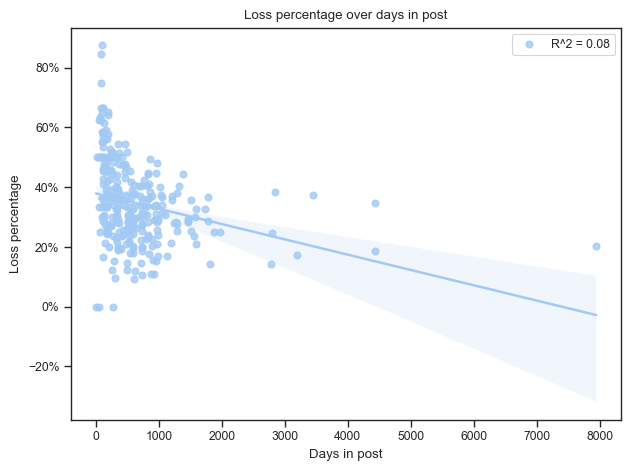

In [ ]:
# Plot of wins, draw and losses percentage over days in post
head_coach['win_percentage'] = head_coach['wins'] / head_coach['matches'] * 100
head_coach['draw_percentage'] = head_coach['draws'] / head_coach['matches'] * 100
head_coach['loss_percentage'] = head_coach['losses'] / head_coach['matches'] * 100

def plot_percentage_over_days(data, y_value, y_leg):
    plt.figure()
    sns.regplot(x='days_in_post', y=y_value, data=data)
    
    plt.title(f'{y_leg.capitalize()} percentage over days in post')
    plt.xlabel('Days in post')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    # Calculate R-squared value
    y_pred = np.poly1d(np.polyfit(data['days_in_post'], data[y_value], 1))(data['days_in_post'])
    ss_res = np.sum((data[y_value] - y_pred) ** 2)
    ss_tot = np.sum((data[y_value] - np.mean(data[y_value])) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    plt.legend([f'R^2 = {r2:.2f}'])
    plt.savefig(f'figures/{y_value}_percentage_over_days_in_post.png')

plot_percentage_over_days(head_coach, 'win_percentage', 'win')
plot_percentage_over_days(head_coach, 'draw_percentage', 'draw')
plot_percentage_over_days(head_coach, 'loss_percentage', 'loss')

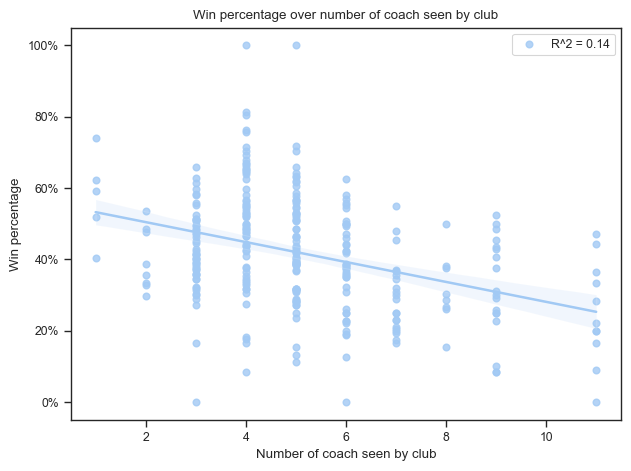

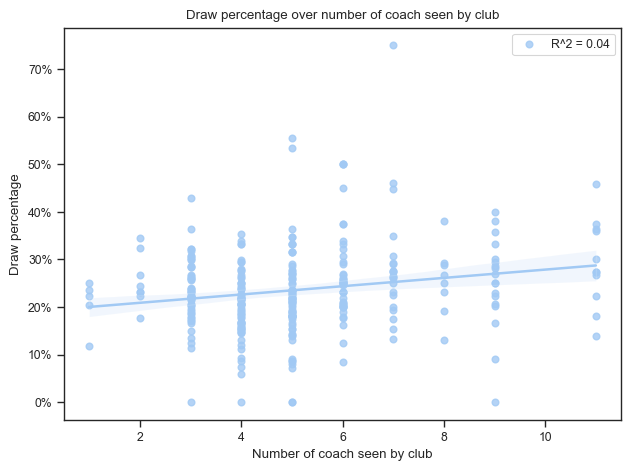

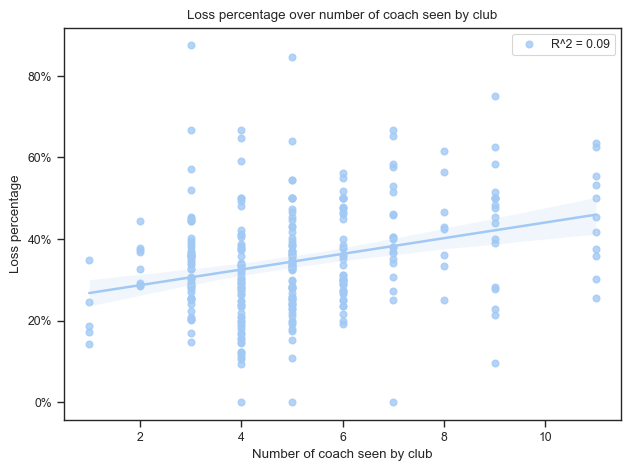

In [ ]:
# Plot of wins, draw and losses percentage over number of coach seen by club

# Calculate number of coach seen by club
coach_per_club = head_coach.groupby('team').size().reset_index(name='coach_count')

# Merge coach_per_club with head_coach
head_coach = head_coach.merge(coach_per_club, on='team')

# Plot percentage over number of coach seen by club

def plot_percentage_over_coach(data, y_value, y_leg):
    plt.figure()
    sns.regplot(x='coach_count', y=y_value, data=data)
    
    plt.title(f'{y_leg.capitalize()} percentage over number of coach seen by club')
    plt.xlabel('Number of coach seen by club')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    # Calculate R-squared value
    y_pred = np.poly1d(np.polyfit(data['coach_count'], data[y_value], 1))(data['coach_count'])
    ss_res = np.sum((data[y_value] - y_pred) ** 2)
    ss_tot = np.sum((data[y_value] - np.mean(data[y_value])) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    plt.legend([f'R^2 = {r2:.2f}'])
    plt.savefig(f'figures/{y_value}_percentage_over_coach_count.png')

plot_percentage_over_coach(head_coach, 'win_percentage', 'win')
plot_percentage_over_coach(head_coach, 'draw_percentage', 'draw')
plot_percentage_over_coach(head_coach, 'loss_percentage', 'loss')

Pour les deux séries de graphs : 
- r2 très faible : pas concluant

Question intéressante : le renouvellement du coach en dehors des dates conventionnelles (été) change t'il l'effet du changement de coach ?

Pour tout les entraineurs ayant visité au moins 2 clubs, le pourcentage de victoire.
Budget -> linear reg sur pourcentage victoire 

In [13]:
head_coach

,team,league,country,coach_name,staff_dob,staff_nationality,staff_nationality_secondary,appointed,end_date,days_in_post,matches,wins,draws,losses
0,Manchester City,Premier League,England,Pep Guardiola,"Jan 18, 1971",Spain,NaN,2016-07-01,NaT,2784,450,333,53,64
1,Liverpool,Premier League,England,Jürgen Klopp,"Jun 16, 1967",Germany,NaN,2015-10-08,2024-06-30,3188,468,291,96,81
2,Chelsea,Premier League,England,Graham Potter,"May 20, 1975",England,NaN,2022-09-08,2023-04-02,206,31,12,8,11
3,Chelsea,Premier League,England,Thomas Tuchel,"Aug 29, 1973",Germany,NaN,2021-01-26,2022-09-07,589,100,63,19,18
4,Chelsea,Premier League,England,Frank Lampard,"Jun 20, 1978",England,NaN,2019-07-04,2021-01-25,571,84,44,15,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,Strasbourg,Ligue 1,France,Thierry Laurey,"Feb 14, 1964",France,NaN,2016-07-01,2021-05-24,1788,209,81,51,77
294,Reims,Ligue 1,France,Will Still,"Oct 14, 1992",Belgium,England,2022-10-13,NaT,489,54,23,13,18
295,Reims,Ligue 1,France,Óscar García,"Apr 26, 1973",Spain,NaN,2021-06-23,2022-10-13,477,51,14,18,19
296,Reims,Ligue 1,France,Sébastien Desmazeau,"Jul 22, 1973",France,NaN,2018-07-01,2019-03-30,272,1,1,0,0


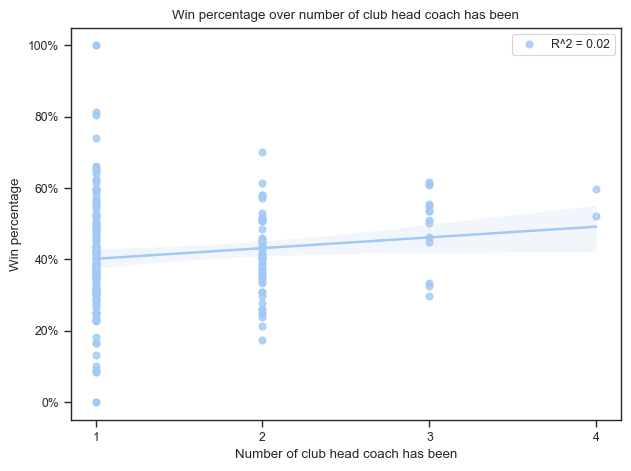

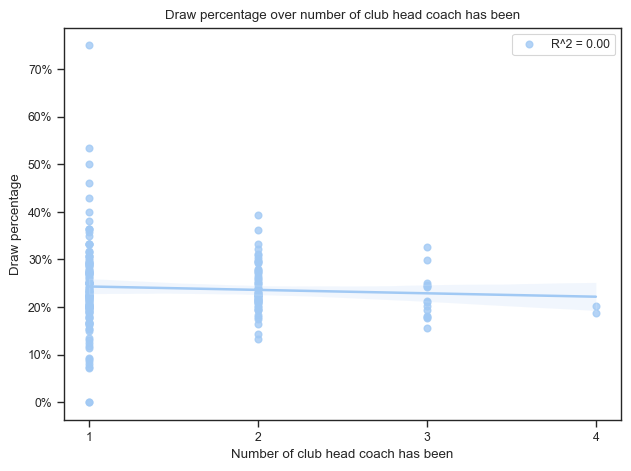

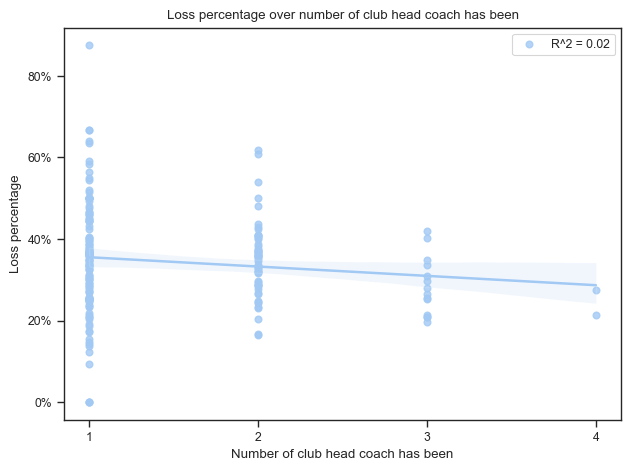

In [21]:
# Plot of wins, draw and losses percentage over number of club head coach has been

head_coach_performance = head_coach.groupby('coach_name').agg({'matches': 'sum', 'wins': 'sum', 'draws': 'sum', 'losses': 'sum', 'team': 'nunique'}).reset_index()
head_coach_performance = head_coach_performance.rename(columns={'team': 'number_of_club'})
head_coach_performance['win_percentage'] = head_coach_performance['wins'] / head_coach_performance['matches'] * 100
head_coach_performance['draw_percentage'] = head_coach_performance['draws'] / head_coach_performance['matches'] * 100
head_coach_performance['loss_percentage'] = head_coach_performance['losses'] / head_coach_performance['matches'] * 100

# Linear regression plot for wins, draw and losses percentage over number of club head coach has been

def plot_percentage_over_club_count(data, y_value, y_leg):
    plt.figure()
    sns.regplot(x='number_of_club', y=y_value, data=data)
    
    plt.title(f'{y_leg.capitalize()} percentage over number of club head coach has been')
    plt.xticks(range(1, data['number_of_club'].max() + 1))
    plt.xlabel('Number of club head coach has been')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

    # Calculate R-squared value
    y_pred = np.poly1d(np.polyfit(data['number_of_club'], data[y_value], 1))(data['number_of_club'])
    ss_res = np.sum((data[y_value] - y_pred) ** 2)
    ss_tot = np.sum((data[y_value] - np.mean(data[y_value])) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    plt.legend([f'R^2 = {r2:.2f}'])
    plt.savefig(f'figures/{y_value}_percentage_over_club_count.png')

plot_percentage_over_club_count(head_coach_performance, 'win_percentage', 'win')
plot_percentage_over_club_count(head_coach_performance, 'draw_percentage', 'draw')
plot_percentage_over_club_count(head_coach_performance, 'loss_percentage', 'loss')

Il n'existe pas de relation entre l'ancienneté du coach et la performance de l'équipe.